In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/Epics Dataset/Dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Train/Cataract/cat_0_8576.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8586.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8587.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8591.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8592.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8593.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8594.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8595.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8596.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8597.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8600.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8603.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8609.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8610.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8612.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8613.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8614.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8615.j

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
train_path="/content/Dataset/Train"
test_path="/content/Dataset/Test"
val_path="/content/Dataset/Test"

In [ ]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(64,64))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(64,64))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(64,64))

        x_val.append(img_arr)

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8068 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
training_set.class_indices

{'Cataract': 0, 'Normal': 1}

In [ ]:
train_y.shape,test_y.shape,val_y.shape

((8068,), (1600,), (1600,))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate, BatchNormalization,LeakyReLU

model_cnn = Sequential()

model_cnn.add(Conv2D(64, (3, 3), padding='same',input_shape=(64,64,3))) 
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization())

model_cnn.add(Conv2D(64, (3, 3))) 
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2))) 
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.35))

model_cnn.add(Conv2D(64, (3, 3), padding='same'))
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization()) 

model_cnn.add(Flatten()) 
model_cnn.add(Dropout(0.5)) 
model_cnn.add(Dense(512)) 
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dense(128))
model_cnn.add(Activation('relu'))
model_cnn.add(Dense(64))
model_cnn.add(Activation('relu'))
model_cnn.add(Dense(1)) 
model_cnn.add(Activation('sigmoid'))

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 activation (Activation)     (None, 64, 64, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                      

In [ ]:
from tensorflow.keras.optimizers import Adam
model_cnn.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.0001),
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)
#Early stopping to avoid overfitting of model

In [ ]:
history = model_cnn.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=20,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/20
253/253 [==============================] - 16s 28ms/step - loss: 0.2772 - accuracy: 0.8782 - val_loss: 1.1946 - val_accuracy: 0.5088
Epoch 2/20
253/253 [==============================] - 6s 26ms/step - loss: 0.1176 - accuracy: 0.9559 - val_loss: 0.6401 - val_accuracy: 0.7563
Epoch 3/20
253/253 [==============================] - 6s 26ms/step - loss: 0.0640 - accuracy: 0.9797 - val_loss: 0.1471 - val_accuracy: 0.9456
Epoch 4/20
253/253 [==============================] - 6s 26ms/step - loss: 0.0436 - accuracy: 0.9866 - val_loss: 0.0958 - val_accuracy: 0.9631
Epoch 5/20
253/253 [==============================] - 7s 26ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0842 - val_accuracy: 0.9725
Epoch 6/20
253/253 [==============================] - 6s 26ms/step - loss: 0.0308 - accuracy: 0.9898 - val_loss: 0.1528 - val_accuracy: 0.9431
Epoch 7/20
253/253 [==============================] - 6s 26ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0827 - val_accuracy: 0.968

In [ ]:
model_cnn.evaluate(test_x,test_y,batch_size=32)

50/50 [==============================] - 0s 7ms/step - loss: 0.0771 - accuracy: 0.9744


[0.07707342505455017, 0.9743750095367432]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
#predict
y_pred=model_cnn.predict(test_x)
y_classes = ((y_pred > 0.5)+0).ravel()
y_classes

50/50 [==============================] - 0s 6ms/step


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#get classification report
print(classification_report(y_classes,test_y))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       801
           1       0.97      0.97      0.97       799

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



In [ ]:
y_classes

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
cf_matrix = confusion_matrix(y_classes, test_y)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("/content/Dataset/Test/Normal/cat_0_1001.jpg", target_size = (64, 64))
test_image = image.img_to_array(test_image)/255.0
test_image = np.expand_dims(test_image, axis = 0)
result = model_cnn.predict(test_image)
if result>0.75:
    prediction = 'Normal'
else:
    prediction = 'Cataract'
print(result)
print(result.shape)
print(prediction)


1/1 [==============================] - 0s 16ms/step
[[0.9999999]]
(1, 1)
Normal


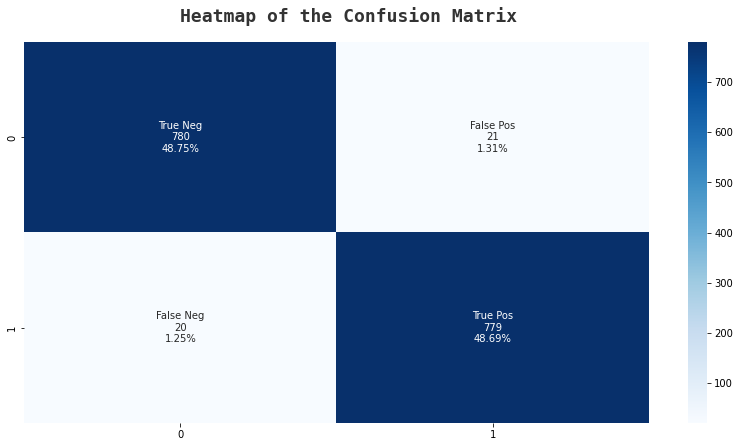

In [ ]:
import seaborn as sns
labels=['Cataract','Normal']
fig,ax=plt.subplots(1,1,figsize=(14,7))
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold', fontname='monospace',y=0.92,x=0.28,alpha=0.8)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns_plot = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
sns_plot.figure.savefig('/content/drive/MyDrive/heatmapofcnn.png')
plt.show()


In [ ]:
model_cnn.save("/content/drive/MyDrive/cnnmodel.h5")

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 19.4 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/paulgavrikov/visualkeras --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-712f2fpw
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-712f2fpw
  Resolved https://github.com/paulgavrikov/visualkeras to commit d7111d3471173c0b16853a6ce5e4cc645498380a
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


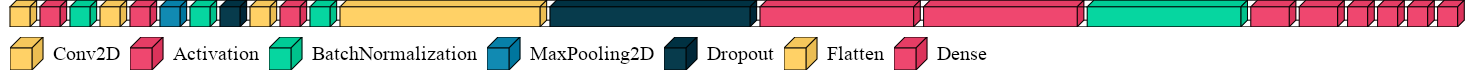

In [ ]:
import visualkeras
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D

from PIL import ImageFont
from collections import defaultdict
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D,Input,Dense
font = ImageFont.truetype("/content/drive/MyDrive/times.ttf", 20)

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model_cnn,legend=True, font=font,scale_xy=0.2, scale_z=0.3,max_z=200,color_map=color_map)


In [ ]:
import keras.utils as image

In [ ]:
image.save_img("/content/drive/MyDrive/cnn_archi.png",archi_img)

In [ ]:
import visualkeras
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D

from PIL import ImageFont
from collections import defaultdict
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D,Input,Dense
font = ImageFont.truetype("/content/times new roman bold.ttf", 20)

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model,legend=True, font=font,scale_xy=0.2, scale_z=0.3,max_z=200,color_map=color_map)


ModuleNotFoundError: ignored

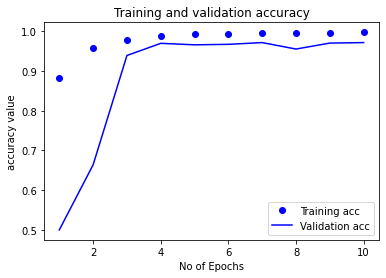

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("accuracy value")
plt.legend()
plt.figure()
plt.show()
plt.savefig("/content/drive/MyDrive/cnntraininggrapg.png")


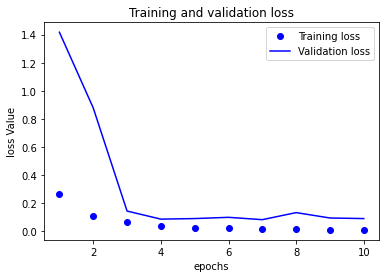

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("epochs")
plt.ylabel("loss Value")
plt.legend()
plt.show()
plt.savefig("/content/drive/MyDrive/cnnvalidationimg.png")